In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import re
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
imdbdata = pd.read_csv("/content/IMDB Dataset (1).csv")

In [ ]:
print(imdbdata.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print(imdbdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
def missing_values_table(dataset):
        # Total missing values

        miss_val = imdbdata.isnull().sum()

        # Percentage of missing values

        miss_val_percent = 100 * imdbdata.isnull().sum() / len(imdbdata)

        # Make a table with the results

        miss_val_tab = pd.concat([miss_val, miss_val_percent], axis=1)

        # Rename the columns

        miss_val_tab_ren_columns = miss_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending

        miss_val_tab_ren_columns = miss_val_tab_ren_columns[
            miss_val_tab_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information

        print ("Your selected dataframe has " + str(imdbdata.shape[1]) + " columns.\n"
            "There are " + str(miss_val_tab_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information

        return miss_val_tab_ren_columns

In [ ]:
missing= missing_values_table(imdbdata)
missing

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
imdbdata

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


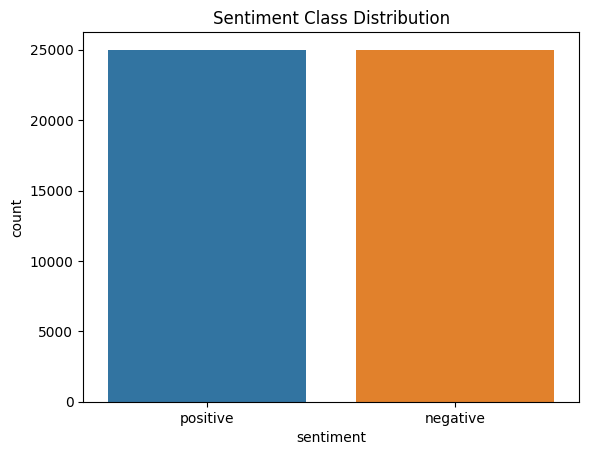

In [ ]:
# Visualize class distribution (assuming 'sentiment' column contains labels)
sns.countplot(x='sentiment', data=imdbdata)
plt.title('Sentiment Class Distribution')
plt.show()

In [ ]:
# prompt: import nltk nltk.download('punkt')

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)




In [ ]:
# Assuming 'review' column contains the movie reviews
imdbdata['processed_text'] = imdbdata['review'].astype(str).apply(preprocess_text)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = imdbdata['processed_text']
y = imdbdata['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np



In [ ]:
import tensorflow as tf
#tf.config.set_visible_devices([], 'GPU')  # To force TensorFlow to use CPU only


###RNN Model Building

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define RNN model architecture
model = Sequential()
model.add(Embedding(len(word_index) + 1, 128, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:

epochs = 10
batch_size = 64
history = model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test_encoded))


Epoch 1/10
625/625 [==============================] - 294s 468ms/step - loss: 0.3479 - accuracy: 0.8468 - val_loss: 0.2740 - val_accuracy: 0.8854
Epoch 2/10
625/625 [==============================] - 293s 470ms/step - loss: 0.1693 - accuracy: 0.9364 - val_loss: 0.2889 - val_accuracy: 0.8822
Epoch 3/10
625/625 [==============================] - 304s 487ms/step - loss: 0.0935 - accuracy: 0.9675 - val_loss: 0.3710 - val_accuracy: 0.8719
Epoch 4/10
625/625 [==============================] - 299s 478ms/step - loss: 0.0581 - accuracy: 0.9798 - val_loss: 0.5298 - val_accuracy: 0.8644
Epoch 5/10
625/625 [==============================] - 294s 470ms/step - loss: 0.0397 - accuracy: 0.9865 - val_loss: 0.6037 - val_accuracy: 0.8649
Epoch 6/10
625/625 [==============================] - 305s 488ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.6418 - val_accuracy: 0.8632
Epoch 7/10
625/625 [==============================] - 308s 493ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.5421 -

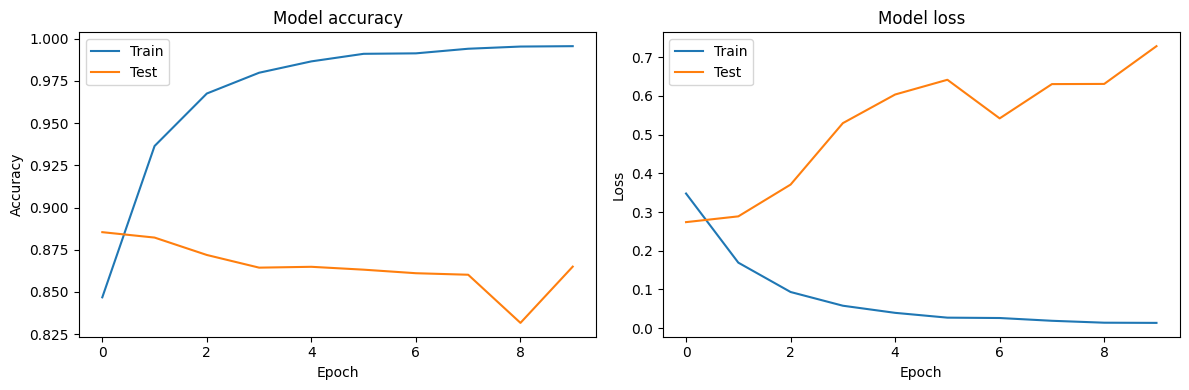

In [ ]:
# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

In [ ]:
label_mapping = {'positive': 1, 'negative': 0}  # Define a mapping for string labels to numeric values
y_test_numeric = y_test.map(label_mapping)

# Now use y_test_numeric with model.evaluate
loss, accuracy = model.evaluate(X_test_pad, y_test_numeric)
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 8s 25ms/step - loss: 0.7285 - accuracy: 0.8650
Test Accuracy: 0.8650000095367432


###Model Training

Training with epochs: 10, batch size: 128
Epoch 1/10
313/313 [==============================] - 185s 585ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.8891 - val_accuracy: 0.8624
Epoch 2/10
313/313 [==============================] - 197s 629ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.9905 - val_accuracy: 0.8653
Epoch 3/10
313/313 [==============================] - 182s 581ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.8935 - val_accuracy: 0.8612
Epoch 4/10
313/313 [==============================] - 181s 578ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.9813 - val_accuracy: 0.8657
Epoch 5/10
313/313 [==============================] - 185s 590ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.8039 - val_accuracy: 0.8597
Epoch 6/10
313/313 [==============================] - 189s 603ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.8400 - val_accuracy: 0.8633
Epoch 7/10
313/313 [==============================] - 189s 605ms/step - loss: 0.00

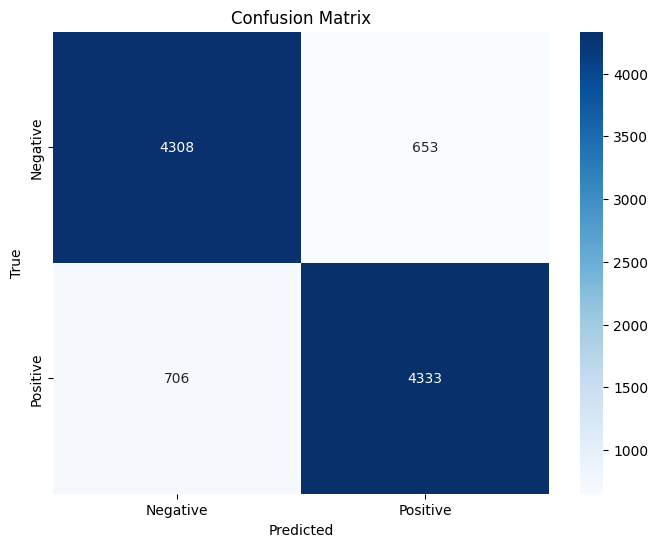

In [ ]:
epochs = [10]  # Simplified values for epochs
batch_sizes = [128]  # Simplified values for batch sizes

for epoch in epochs:
    for batch_size in batch_sizes:
        print(f"Training with epochs: {epoch}, batch size: {batch_size}")

        # Fit the model
        model.fit(X_train_pad, y_train_encoded, epochs=epoch, batch_size=batch_size, validation_data=(X_test_pad, y_test_encoded), verbose=1)

        # Evaluate the model on the test set
        loss, accuracy = model.evaluate(X_test_pad, y_test_encoded, verbose=0)

        # Print the loss and accuracy
        print(f"Test Loss: {loss}, Test Acc: {accuracy}")

predictions = model.predict(X_test_pad)

# Convert predictions to binary labels if needed (for binary classification)
predictions_binary = (predictions > 0.5).astype(int)

# Now calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_encoded, predictions_binary)
precision = precision_score(y_test_encoded, predictions_binary)
recall = recall_score(y_test_encoded, predictions_binary)
f1 = f1_score(y_test_encoded, predictions_binary)
conf_matrix = confusion_matrix(y_test_encoded, predictions_binary)

# Display the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
labels = ['Negative', 'Positive']
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, labels)

#Fine Tuning and Optimization
Bidirectional Rnn

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
max_words = len(word_index) + 1
max_len = X_train_pad.shape[1]
# Define an improved RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Bidirectional(LSTM(50, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with custom learning rate
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the improved model
epochs = 10
batch_size = 128
history = model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate the improved model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
plot_history(history)


Epoch 1/10
313/313 [==============================] - 211s 647ms/step - loss: 0.3609 - accuracy: 0.8329 - val_loss: 0.2693 - val_accuracy: 0.8868
Epoch 2/10
313/313 [==============================] - 199s 637ms/step - loss: 0.1650 - accuracy: 0.9396 - val_loss: 0.3169 - val_accuracy: 0.8814
Epoch 3/10
313/313 [==============================] - 201s 642ms/step - loss: 0.0847 - accuracy: 0.9719 - val_loss: 0.4361 - val_accuracy: 0.8661
Epoch 4/10
313/313 [==============================] - 201s 642ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.4491 - val_accuracy: 0.8691
Epoch 5/10
313/313 [==============================] - 202s 647ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.5810 - val_accuracy: 0.8675
Epoch 6/10
313/313 [==============================] - 199s 638ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.6275 - val_accuracy: 0.8650
Epoch 7/10
313/313 [==============================] - 206s 659ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.6448 -

<Figure size 1200x400 with 0 Axes>

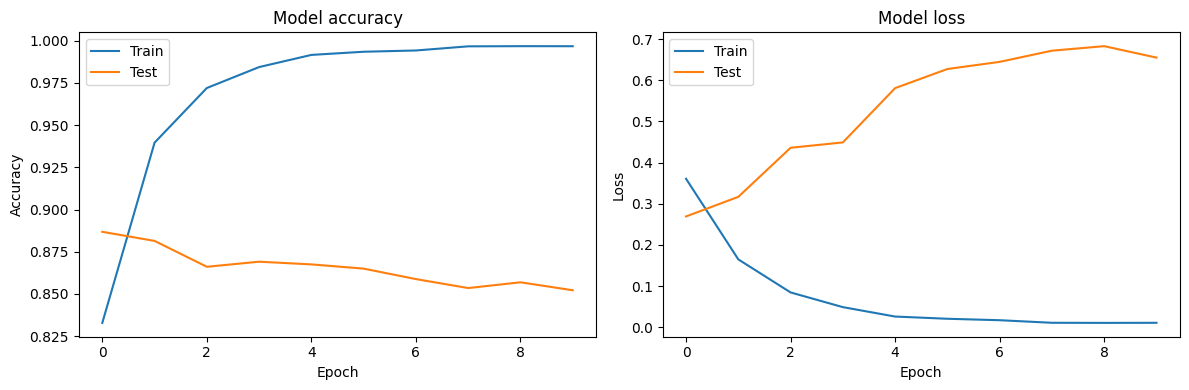

In [ ]:
# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)

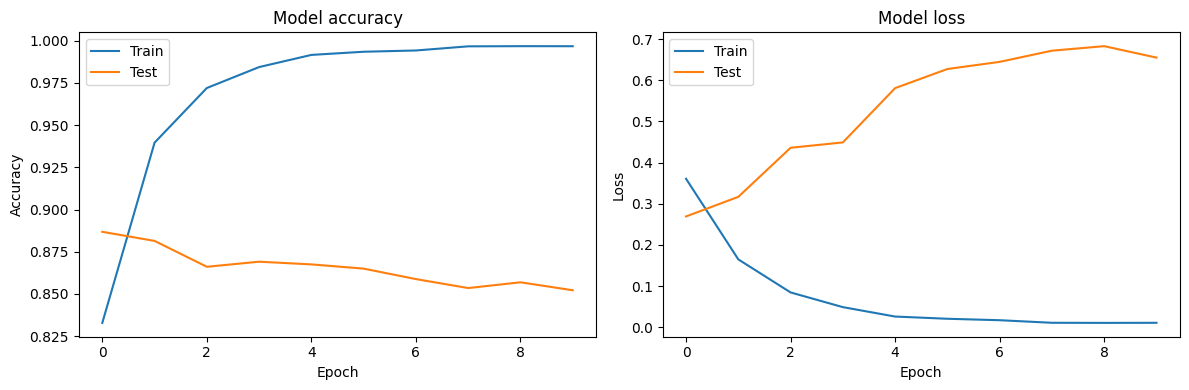

In [ ]:

plot_history(history)

In [ ]:
print(X_train_pad.dtype)
print(y_train.dtype)


int32
object


<ipython-input-25-3a618d71185c>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if predicted_label != actual_label:


Streaming output truncated to the last 5000 lines.


Index: 3176
Actual Label: negative, Predicted Label: [0.01251215]
Sample Text: fan shakespeare waited anxiously see episode comment movie first episode recipe movie take talented actors rich beautiful shakespeare material budget mix well drain life movement dull lifeless serve cold big plain stone cauldron movie give actors least deserve little bit credit okay episode admit first time saw fell asleep halfway understand reaction several veiwers well however watched second time realized whole host intelligent references good lines missed first time around trick episode listen carefully takes couple viewings catch line give second chance see mean episode


Index: 3177
Actual Label: negative, Predicted Label: [0.99987906]
Sample Text: david chase sopranos perhaps television show recent memory series devoid intellect passion devoid soul anyone reading likely knows already james gandolfini tony soprano big fat hole mob boss spoiled b tch w

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Index: 9000
Actual Label: negative, Predicted Label: [0.00024179]
Sample Text: admit deceived title summary back box popped vcr kept waiting waiting waiting something good happen course never makers film tied chair made watch saving private ryan maybe would learn something


Index: 9001
Actual Label: positive, Predicted Label: [0.9998294]
Sample Text: watching film recently constantly remind made ussr makes remarkable many cinematographic effects film seem cliched quite original first saw film first released us struck originality seen years later reason change mind


Index: 9002
Actual Label: negative, Predicted Label: [1.7598832e-06]
Sample Text: really okay series everyone pretty good ca take reba trying funny got stupid accent took show would love see every day br br watching show min said reba destroying show however year old guy dont know name soooo funny really saving br br recipe get great show kick reba put year old guy lead br

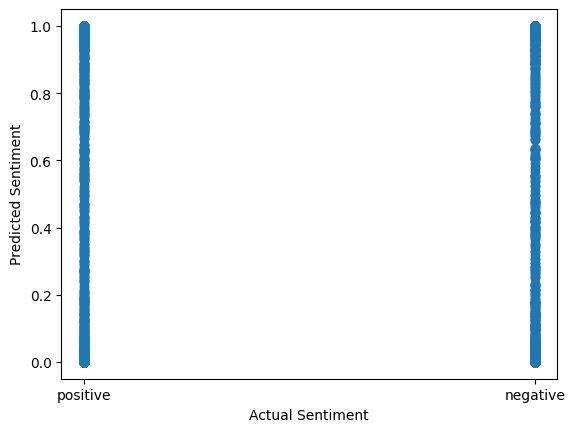

In [ ]:
misclassified_samples = []

# Find misclassified samples
for i, (predicted_label, actual_label) in enumerate(zip(predictions, y_test)):
    if predicted_label != actual_label:
        misclassified_samples.append((X_test.iloc[i], actual_label, predicted_label))

# Analyze misclassified samples
for idx, (sample_text, actual_label, predicted_label) in enumerate(misclassified_samples):
    print(f"Index: {idx}")
    print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")
    print(f"Sample Text: {sample_text}")
    print("\n")
    actual_sentiments = []
predicted_sentiments = []

for i, (text, actual_label, predicted_label) in enumerate(misclassified_samples):
   actual_sentiments.append(actual_label)
   predicted_sentiments.append(predicted_label)

# Plot scatter plot
plt.scatter(actual_sentiments, predicted_sentiments)
plt.ylabel('Predicted Sentiment')
plt.xlabel('Actual Sentiment')
plt.show()

In [ ]:
!pip install matplotlib==3.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
seaborn 0.12.2 requires matplotlib!=3.6.1,>=3.1, but you have matplotlib 3.6.1 which is incompatible.


##Dropout

In [ ]:
print(X_train.dtype)
print(y_train.dtype)

object
object


In [ ]:
label_mapping = {'positive': 1, 'negative': 0}

In [ ]:
y_test_numeric = y_test.map(label_mapping)

Epoch 1/10
313/313 [==============================] - 537s 2s/step - loss: 0.4119 - accuracy: 0.8078 - val_loss: 0.3243 - val_accuracy: 0.8662
Epoch 2/10
313/313 [==============================] - 519s 2s/step - loss: 0.2718 - accuracy: 0.8913 - val_loss: 0.3115 - val_accuracy: 0.8639
Epoch 3/10
313/313 [==============================] - 517s 2s/step - loss: 0.2103 - accuracy: 0.9183 - val_loss: 0.3741 - val_accuracy: 0.8544
Epoch 4/10
313/313 [==============================] - 513s 2s/step - loss: 0.1700 - accuracy: 0.9346 - val_loss: 0.3759 - val_accuracy: 0.8591
Epoch 5/10
313/313 [==============================] - 514s 2s/step - loss: 0.1333 - accuracy: 0.9517 - val_loss: 0.4401 - val_accuracy: 0.8539
Epoch 6/10
313/313 [==============================] - 514s 2s/step - loss: 0.1077 - accuracy: 0.9629 - val_loss: 0.4421 - val_accuracy: 0.8532
Epoch 7/10
313/313 [==============================] - 507s 2s/step - loss: 0.0854 - accuracy: 0.9704 - val_loss: 0.4913 - val_accuracy: 0.8486

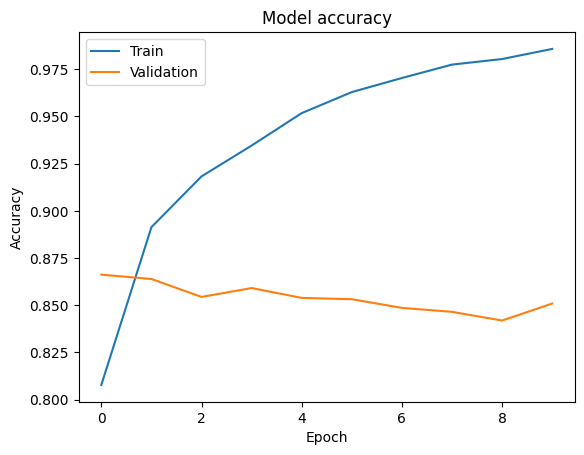

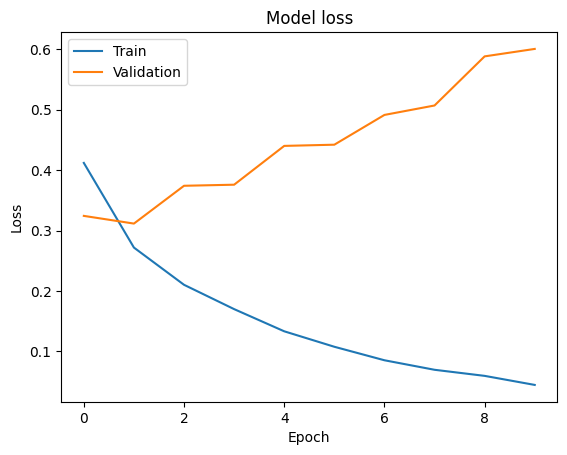

In [ ]:
# Assuming your DataFrame is named 'imdbdata'
imdbdata['sentiment'] = imdbdata['sentiment'].map({'positive': 1, 'negative': 0})

# Extract features and labels
X = imdbdata['review'].values
y = imdbdata['sentiment'].values

max_words = 10000
max_len = 100

# Tokenize text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(sequences, maxlen=max_len)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_test, y_test))

# Plotting the training history
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plotting the history
plot_history(history)